In [162]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
words = open('names.txt', 'r').read().splitlines()

In [164]:
words[:10], len(words), min(len(w) for w in words), max(len(w) for w in words) # Some general info

(['emma',
  'olivia',
  'ava',
  'isabella',
  'sophia',
  'charlotte',
  'mia',
  'amelia',
  'harper',
  'evelyn'],
 32033,
 2,
 15)

In [165]:
# Neat trick
for w in words[:2]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a
o l
l i
i v
v i
i a


Now we have the following information about 'Emma': 'em', 'mm', and 'ma'. However, there is still more information to be extracted from this name: it starts with an e and ends with an a. So, we introduce a special starting token and ending token:

In [166]:
for w in words[:2]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>


In [167]:
# Counting bigrams in dictionary
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [168]:
# Some more info
sorted(b.items(), key=lambda x: -x[1])[:3]

[(('n', '<E>'), 6763), (('a', '<E>'), 6640), (('a', 'n'), 5438)]

In [169]:
# # Organize into array
# N = torch.zeros((28,28), dtype = torch.int32)
# chars = sorted(list(set(''.join(words))))
# stoi = {s:i for i,s in enumerate(chars)}
# stoi['<S>'] = 26
# stoi['<E>'] = 27
# Clean up
N = torch.zeros((27,27), dtype = torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
iots = {i:s for s,i in stoi.items()}

In [170]:
for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

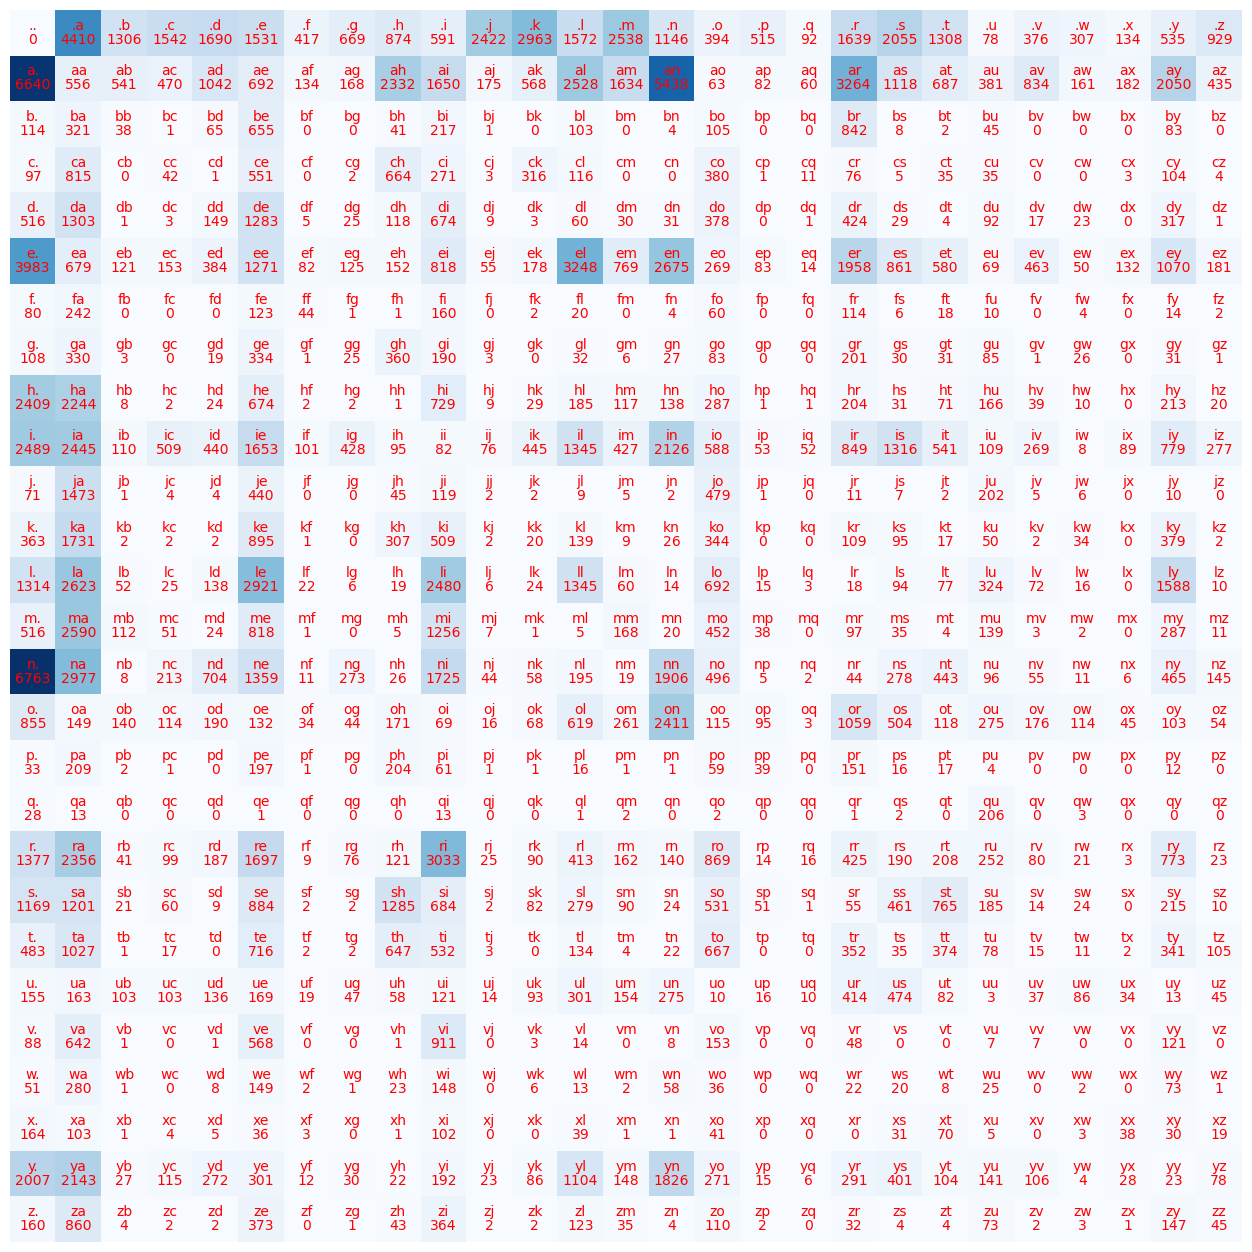

In [171]:
# Visualize
plt.figure(figsize=(16,16)) 
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = iots[i] + iots[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='red')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='red')
plt.axis('off')

In [172]:
# Broadcasting semantics
# 27 27
# 27 1
P = (N+1).float() # Model smoothing, see later
P /= P.sum(dim=1, keepdim=True) # In-place operation preferred
# P[0].sum()

In [173]:
# Some sampling
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        #p = N[ix].float()
        #p /= p.sum()                   # Trained on just probabilities
        #p = torch.ones(27) / 27.0      # No training at all, uniform

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        out.append(iots[ix])
        if ix == 0:
            break
    print(''.join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


How to evaluate model? We can take the likelihood of the model, which would mean multiplying all probablities (we look at all bigrams from training data, take the predicted probabilities of our model, and multiply all these to get a single number that tells us how good our model is). But this would end up in a very small number (all probs are betweeen 0 and 1), so we take the log likelihood. This gives a more negative number when probabilities are low, and a near zero if probablities near 1. Since, we want a loss function that gives a low number if the model performs well (we want to minimize the loss function), we invert the log likelihood (negative log likelihood). Finally, instead of taking the sum of each negative log likelihood we average it.

In [174]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log-likelihood (log is monotonic)
# equivalent to minimizing the negative log-likelihood
# equivalent to minimizing the average negative log-likelihood

In [175]:
log_likelihood = 0.0
n = 0

for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
mll = -log_likelihood
print(f'{mll=}')
print(f'{mll/n}')

log_likelihood=tensor(-559951.5625)
mll=tensor(559951.5625)
2.4543561935424805


In [176]:
log_likelihood = 0.0
n = 0

for w in ["jasperqz"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
mll = -log_likelihood
print(f'{mll=}')
print(f'{mll/n}')

.j: 0.0756 -2.5826
ja: 0.5036 -0.6860
as: 0.0330 -3.4113
sp: 0.0064 -5.0524
pe: 0.1880 -1.6711
er: 0.0958 -2.3455
rq: 0.0013 -6.6183
qz: 0.0033 -5.7004
z.: 0.0664 -2.7122
log_likelihood=tensor(-30.7799)
mll=tensor(30.7799)
3.419994354248047


Above, we see that the "qz" bigram has an infinite value for the average negative log likelihood. This is because the biagram qz does not exist in out training data. We can fix this by smoothing our model by adding some fake counts.

# Neural network method

In [177]:
# Create training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [178]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [179]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [180]:
xenc.shape

torch.Size([5, 27])

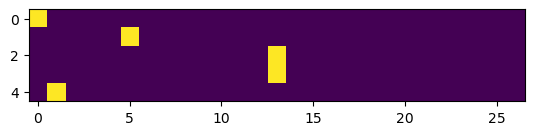

In [181]:
plt.imshow(xenc)

In [182]:
# (5, 27) @ (27, 27) = (5, 27)
W = torch.randn((27, 27))
xenc @ W

tensor([[ 1.5935e+00, -9.9807e-01, -5.1135e-01,  1.3333e+00,  2.0215e-02,
          5.1226e-01,  8.0973e-01,  1.1651e+00, -1.6865e+00,  1.5793e-01,
         -8.3130e-02,  2.0082e-01, -2.2976e-01,  4.6074e-01, -6.5037e-01,
         -5.4912e-01,  1.0522e+00, -7.3249e-01, -1.0118e+00,  1.3302e-01,
         -4.5021e-01, -1.4915e+00, -3.7648e-01,  2.2109e-01,  4.5275e-01,
          5.0948e-01,  1.3937e+00],
        [-8.9611e-01, -4.8001e-01, -8.0330e-01,  1.6820e+00,  1.0216e+00,
         -8.7674e-01, -6.0145e-02,  5.2096e-01,  2.6126e+00,  7.4438e-01,
          5.4557e-01, -1.1302e+00, -8.1692e-01, -9.6379e-01,  7.3335e-01,
          7.1142e-01, -4.6123e-01,  8.3593e-01, -9.9445e-01,  4.2319e-01,
         -2.5729e-01, -8.6404e-01, -1.2544e+00, -1.5230e-01,  1.2210e-01,
         -9.1384e-01, -6.4204e-01],
        [-6.2032e-01,  3.9591e-01,  3.1990e-01, -7.4933e-02, -1.5202e+00,
         -1.5892e-01,  4.5472e-01,  6.0908e-01,  1.2528e-01,  2.1320e+00,
         -1.3023e-01,  9.2090e-01, -3.29

In [183]:
(xenc @ W)[3, 13]

tensor(0.1247)

In [184]:
(xenc[3] * W[:, 13]).sum() # dot product

tensor(0.1247)

In [185]:
logits = xenc @ W # log-counts
counts = logits.exp() # counts, equivalent N
probs = counts / counts.sum(dim=1, keepdim=True) # probabilities
probs

tensor([[0.1239, 0.0093, 0.0151, 0.0955, 0.0257, 0.0420, 0.0566, 0.0807, 0.0047,
         0.0295, 0.0232, 0.0308, 0.0200, 0.0399, 0.0131, 0.0145, 0.0721, 0.0121,
         0.0092, 0.0288, 0.0161, 0.0057, 0.0173, 0.0314, 0.0396, 0.0419, 0.1015],
        [0.0091, 0.0139, 0.0100, 0.1205, 0.0622, 0.0093, 0.0211, 0.0377, 0.3055,
         0.0472, 0.0387, 0.0072, 0.0099, 0.0085, 0.0467, 0.0456, 0.0141, 0.0517,
         0.0083, 0.0342, 0.0173, 0.0094, 0.0064, 0.0192, 0.0253, 0.0090, 0.0118],
        [0.0137, 0.0379, 0.0351, 0.0237, 0.0056, 0.0218, 0.0402, 0.0469, 0.0289,
         0.2151, 0.0224, 0.0641, 0.0255, 0.0289, 0.0430, 0.0087, 0.0117, 0.0290,
         0.0492, 0.0165, 0.0348, 0.0507, 0.0140, 0.0323, 0.0214, 0.0170, 0.0618],
        [0.0137, 0.0379, 0.0351, 0.0237, 0.0056, 0.0218, 0.0402, 0.0469, 0.0289,
         0.2151, 0.0224, 0.0641, 0.0255, 0.0289, 0.0430, 0.0087, 0.0117, 0.0290,
         0.0492, 0.0165, 0.0348, 0.0507, 0.0140, 0.0323, 0.0214, 0.0170, 0.0618],
        [0.1089, 0.0017,

In [186]:
probs.shape

torch.Size([5, 27])

## Summary

In [187]:
# Randomly initliaze 27 neurons' weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [188]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(dim=1, keepdim=True) # probabilities for next character
# Last two lines together are called "softmax"

In [189]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('----------------------------------------------')
    print(f'bigram example {i+1}: {iots[x]}{iots[y]} (indexes {x}, {y})')
    print(f'input to the neural net:', x)
    print(f'ouput probabilities from the neural net:', probs[i])
    print(f'label (actual next character):', y)
    p = probs[i, y]
    print(f'probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print(f'log likelihood:', logp.item())
    nll = -logp
    print(f'negative log likelihood:', nll.item())
    nlls[i] = nll

print('==============================================')
print(f'average negative log likelihood, this is the loss:', nlls.mean().item())

----------------------------------------------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
ouput probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
----------------------------------------------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
ouput probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022

In [190]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [191]:
# Backward pass
W.grad = None # zero out the gradient, none if more efficient in PyTorch
loss.backward()

In [192]:
W.shape, W.grad.shape

(torch.Size([27, 27]), torch.Size([27, 27]))

In [193]:
W.grad # e.g., W[0,0] + h would have a positive influence on the loss

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [194]:
W.data += -0.1 * W.grad # update the weights

In [195]:
# Now loss should be slightly lower
loss.item()

3.7693049907684326

## Optimization, but for real now

In [203]:
# create data set
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'Number of examples: {num}')

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of examples: 228146


In [206]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(dim=1, keepdim=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.1*(W**2).mean() # added model smoothing, regularization, similar as adding N+1
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

2.7383651733398438
2.7047767639160156
2.6825735569000244
2.6664316654205322
2.654161214828491
2.644524335861206
2.636770009994507
2.6304116249084473
2.6251204013824463
2.6206626892089844
2.6168699264526367
2.613614082336426
2.6107981204986572
2.6083476543426514
2.6062026023864746
2.604316234588623
2.602649211883545
2.601170063018799
2.599853515625
2.598677396774292
2.5976240634918213
2.596677780151367
2.595824956893921
2.59505558013916
2.5943593978881836
2.593728542327881
2.5931553840637207
2.5926342010498047
2.592158794403076
2.5917255878448486
2.5913290977478027
2.59096622467041
2.5906341075897217
2.5903286933898926
2.590048313140869
2.5897905826568604
2.589553117752075
2.589334011077881
2.5891318321228027
2.5889453887939453
2.588773012161255
2.588613271713257
2.5884652137756348
2.5883283615112305
2.5882012844085693
2.588083028793335
2.5879735946655273
2.587871551513672
2.5877764225006104
2.5876882076263428
2.587606191635132
2.5875298976898193
2.5874576568603516
2.5873911380767822
2.

In [207]:
# Sampling from the neural network
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0

    while True:

        # -------
        # BEFORE
        # p = P[ix]
        # -------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() 
        logits = xenc @ W 
        counts = logits.exp()
        p = counts / counts.sum(dim=1, keepdim=True)
        # -------
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(iots[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaynnnyles.
koneraisah.
andhunizarie.
